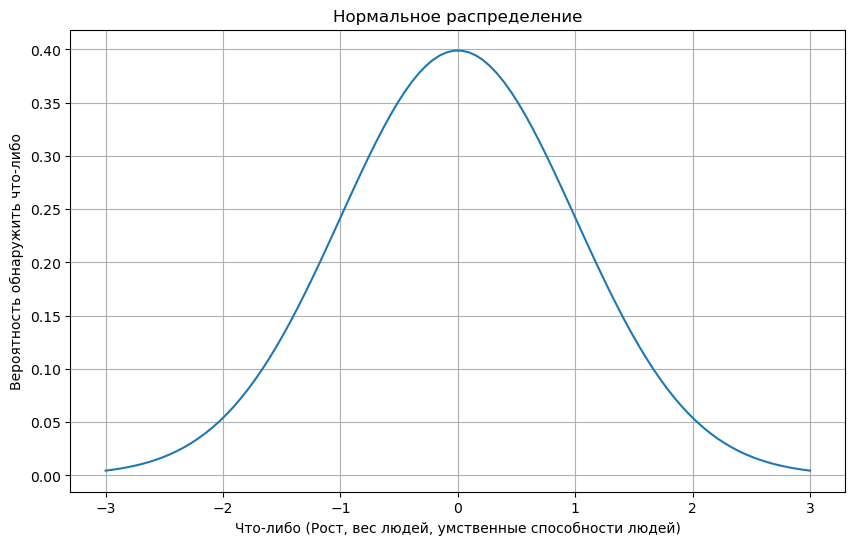

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Параметры нормального распределения
mu = 0       # Среднее значение
sigma = 1    # Стандартное отклонение

# Создаем диапазон значений
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Рассчитываем плотность вероятности
y = norm.pdf(x, mu, sigma)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(x, y)

# Настройка подписей и оформления
plt.title('Нормальное распределение')
plt.xlabel('Что-либо (Рост, вес людей, умственные способности людей)')
plt.ylabel('Вероятность обнаружить что-либо')
plt.grid(True)

# Показать график
plt.show()

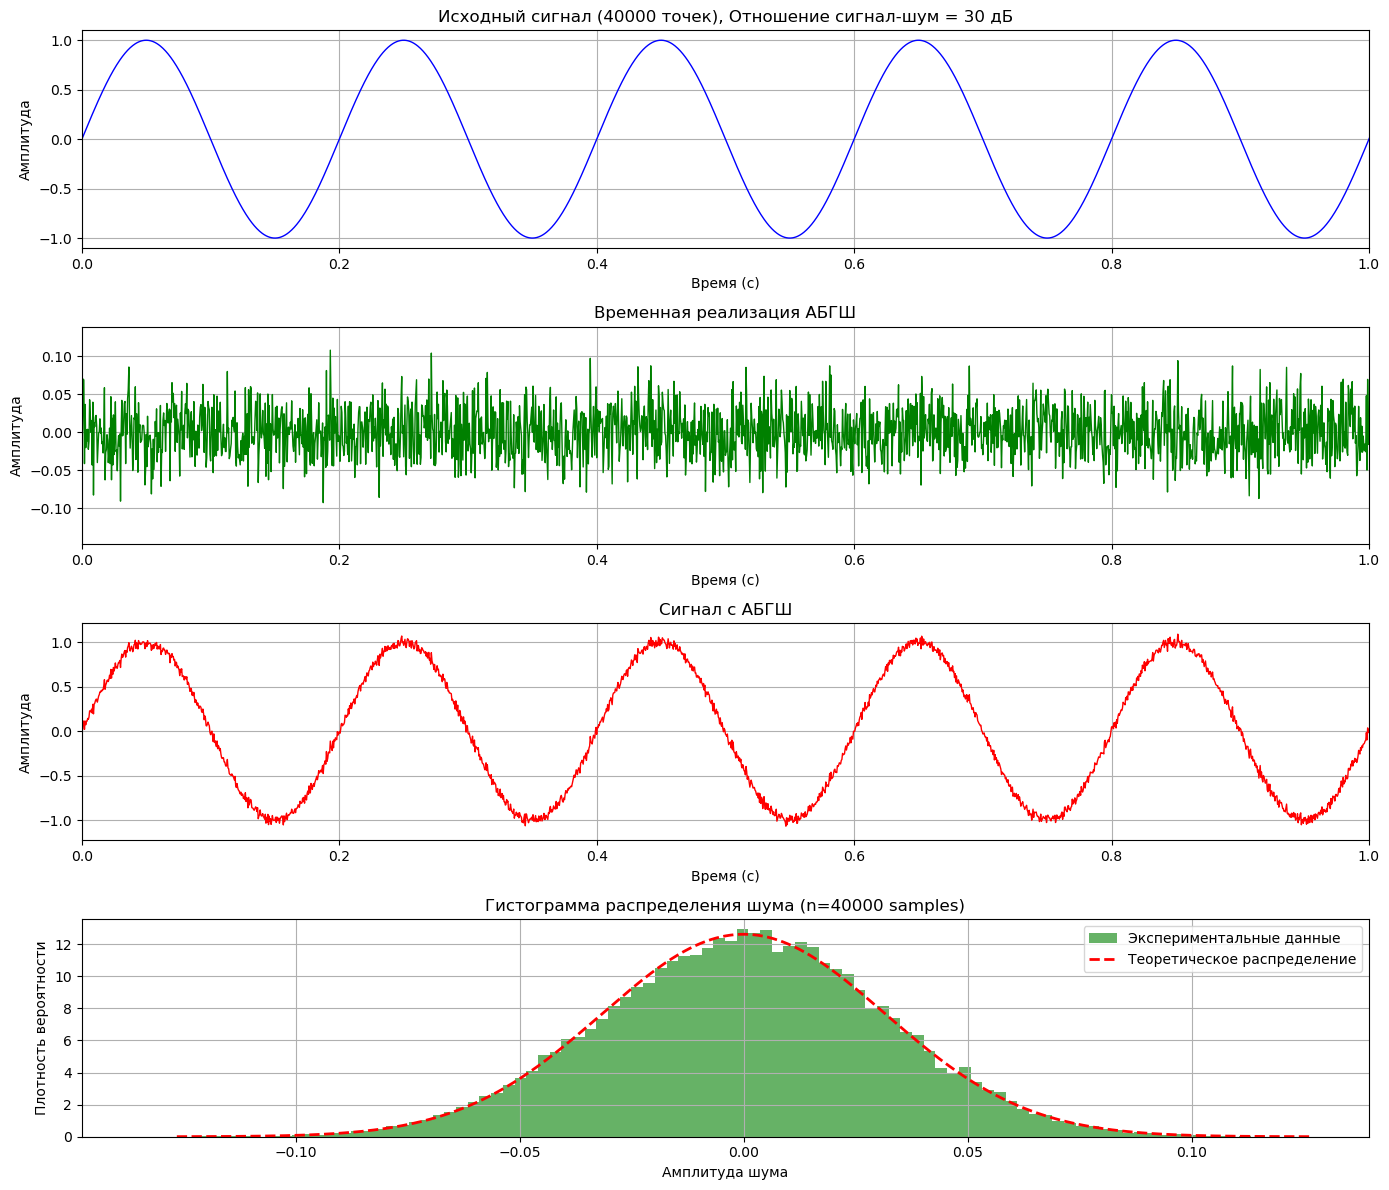

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# =====================================
# Параметры модели (можно менять)
# =====================================
fs = 2000            # Увеличили частоту дискретизации (было 1000 Гц)
duration = 20         # Увеличили длительность сигнала (было 1 сек)
f = 5                # Частота сигнала (Гц)
A = 1                # Амплитуда сигнала
SNR_dB = 30          # Отношение сигнал-шум (дБ)
# =====================================

# Генерация временной оси
t = np.arange(0, duration, 1/fs)

# 1. Исходный сигнал (синусоида)
x = A * np.sin(2*np.pi*f*t)

# 2. Генерация АБГШ
sigma = A / (10**(SNR_dB/20))
noise = np.random.normal(0, sigma, len(t))

# 3. Зашумленный сигнал
y = x + noise

# =====================================
# Визуализация
# =====================================
plt.figure(figsize=(14, 12))

# Исходный сигнал (первые 0.5 сек)
plt.subplot(4, 1, 1)
plt.plot(t, x, 'b', linewidth=1)
plt.title(f'Исходный сигнал ({len(t)} точек), Отношение сигнал-шум = {SNR_dB} дБ')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.xlim(0, 1)
plt.grid(True)

# Реализация шума (первые 0.5 сек)
plt.subplot(4, 1, 2)
plt.plot(t, noise, 'g', linewidth=1)
plt.title('Временная реализация АБГШ')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.xlim(0, 1)
plt.grid(True)

# Зашумленный сигнал (первые 0.5 сек)
plt.subplot(4, 1, 3)
plt.plot(t, y, 'r', linewidth=1)
plt.title('Сигнал с АБГШ')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.xlim(0, 1)
plt.grid(True)

# Гистограмма с увеличенной выборкой
plt.subplot(4, 1, 4)
plt.hist(noise, bins=100, density=True, alpha=0.6, color='green',  # Увеличили число бинов
         label='Экспериментальные данные')

# Теоретическая кривая (5000 точек для гладкости)
x_hist = np.linspace(-4*sigma, 4*sigma, 8000)  # Увеличили в 50 раз
plt.plot(x_hist, norm.pdf(x_hist, 0, sigma), 
         'r--', linewidth=2, label='Теоретическое распределение')

plt.title(f'Гистограмма распределения шума (n={len(noise)} samples)')
plt.xlabel('Амплитуда шума')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

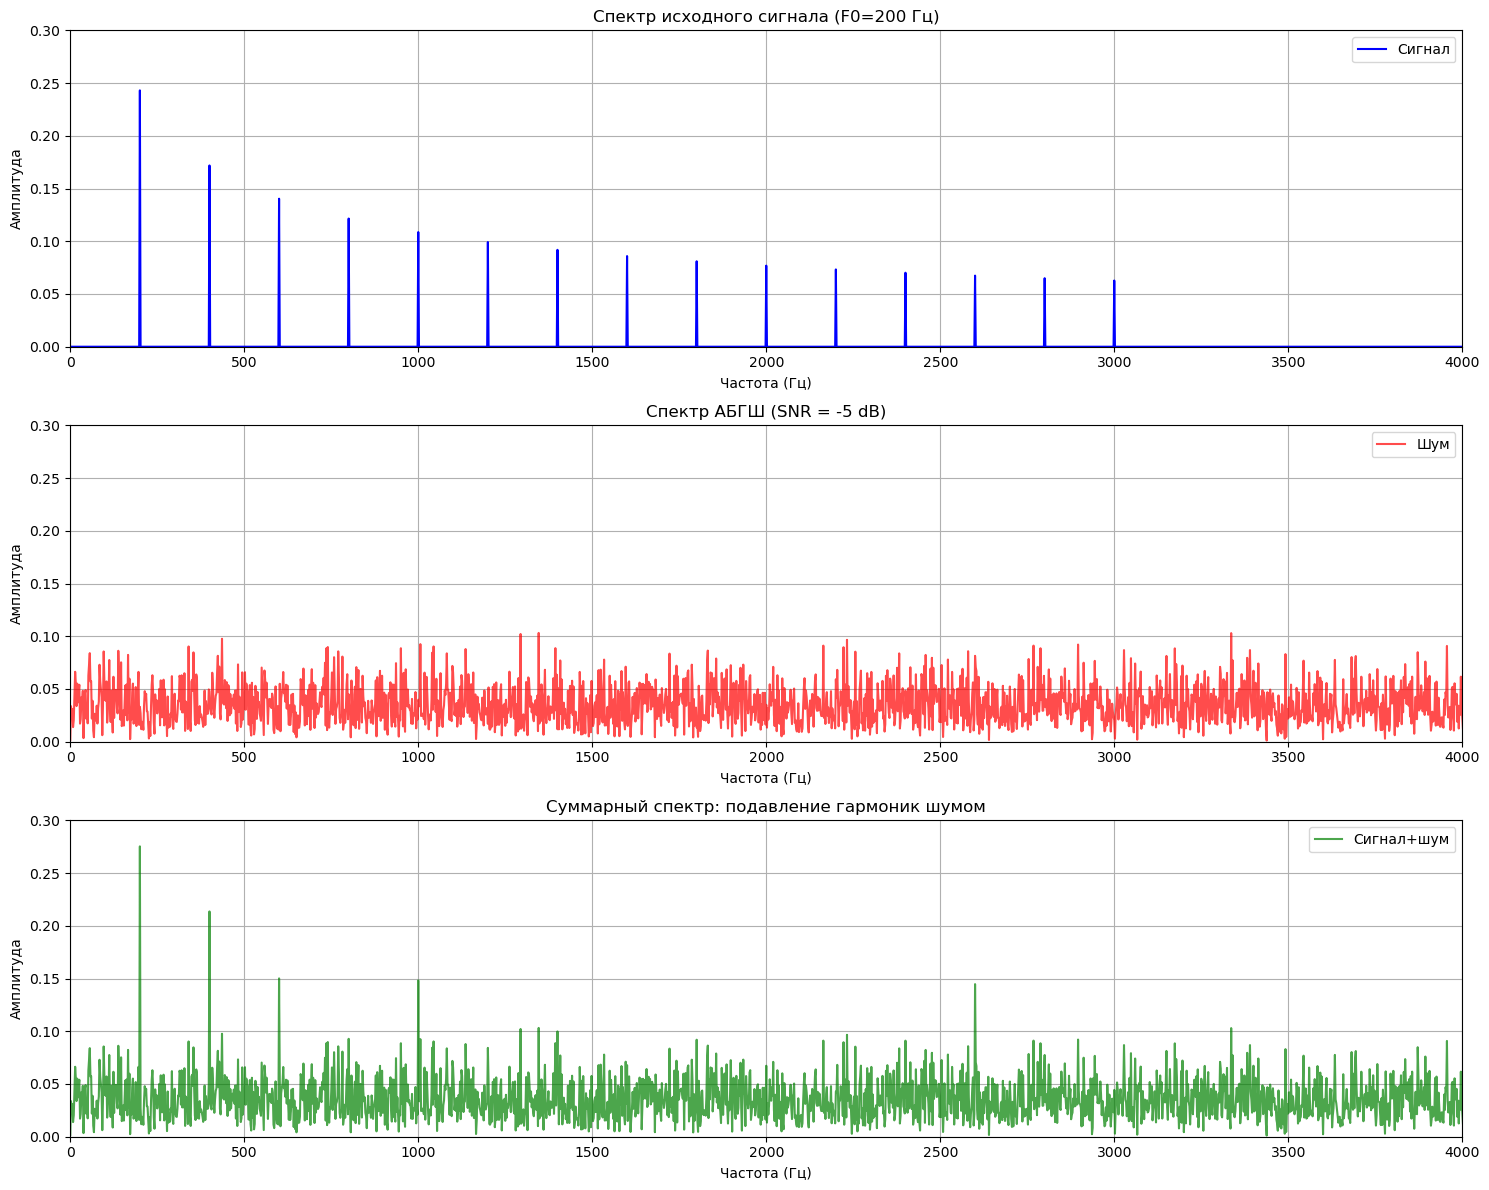

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
fs = 16000           # Частота дискретизации
duration = 0.5       # Длительность сигнала
t = np.arange(0, duration, 1/fs)

# 1. Генерация голосоподобного сигнала
f0 = 200             # Основная частота
harmonics = 15       # Количество гармоник

signal = np.zeros_like(t)
for i in range(1, harmonics+1):
    freq = f0 * i
    amplitude = 1.0 / np.sqrt(i)  # Естественное затухание амплитуд
    signal += amplitude * np.sin(2*np.pi*freq*t)
signal /= np.max(np.abs(signal))  # Нормировка

# 2. Генерация усиленного АБГШ
SNR_dB = -15          # Сильно ухудшенное отношение сигнал-шум
signal_power = np.mean(signal**2)
sigma = np.sqrt(signal_power / (10**(SNR_dB/10)))
noise = np.random.normal(0, sigma, len(t))

# 3. Суммарный сигнал
combined = signal + noise

# Функция для расчета спектра
def amplitude_spectrum(x, fs):
    n = len(x)
    freq = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.fft.rfft(x)
    magnitude = np.abs(fft_vals)/n * 2
    return freq, magnitude

# Расчет спектров
freq, spec_signal = amplitude_spectrum(signal, fs)
freq_noise, spec_noise = amplitude_spectrum(noise, fs)
freq_comb, spec_combined = amplitude_spectrum(combined, fs)

# Построение графиков
plt.figure(figsize=(15, 12))

# Спектр полезного сигнала с отметками гармоник
plt.subplot(3, 1, 1)
plt.plot(freq, spec_signal, 'b', label='Сигнал')
plt.title(f'Спектр исходного сигнала (F0={f0} Гц)')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.xlim(0, 4000)
plt.ylim(0, 0.3)
plt.legend()

# Спектр шума
plt.subplot(3, 1, 2)
plt.plot(freq_noise, spec_noise, 'r', alpha=0.7, label='Шум')
plt.title('Спектр АБГШ (SNR = -5 dB)')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.xlim(0, 4000)
plt.ylim(0, 0.3)
plt.legend()

# Суммарный спектр с выделением подавленных гармоник
plt.subplot(3, 1, 3)
plt.plot(freq_comb, spec_combined, 'g', alpha=0.7, label='Сигнал+шум')
plt.title('Суммарный спектр: подавление гармоник шумом')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.xlim(0, 4000)
plt.ylim(0, 0.3)
plt.legend()

plt.tight_layout()
plt.show()

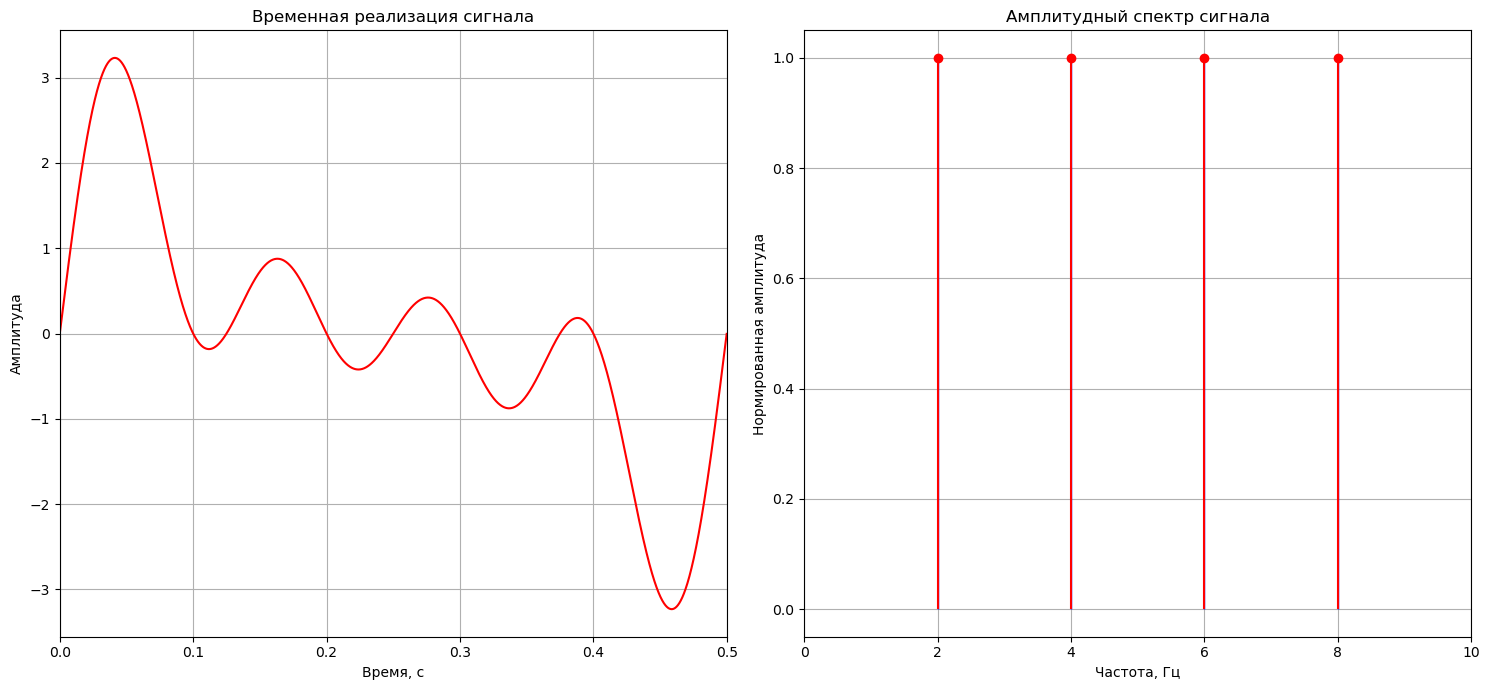

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигнала
fs = 30000  # Частота дискретизации
t = np.arange(0, 2, 1/fs)
f_signal = 2  # Основная частота сигнала

# Генерация сигнала с 4 гармониками
x = np.sin(2*np.pi*f_signal*t) + \
    np.sin(2*np.pi*2*f_signal*t) + \
    np.sin(2*np.pi*3*f_signal*t) + \
    np.sin(2*np.pi*4*f_signal*t)

# Расчет спектра
n = len(t)
freq = np.fft.fftfreq(n, 1/fs)[:n//2]  # Только положительные частоты
X = np.fft.fft(x)
magnitude = np.abs(X/n)[:n//2]*2       # Нормированная амплитуда

# Построение графиков
plt.figure(figsize=(15, 7))

# Временная реализация (первые 0.5 секунд для наглядности)
plt.subplot(1, 2, 1)
plt.plot(t[:15000], x[:15000], 'r')
plt.title('Временная реализация сигнала')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.xlim(0, 0.5)

# Спектр с использованием stem
plt.subplot(1, 2, 2)
markerline, stemlines, baseline = plt.stem(freq, magnitude, linefmt='b-', markerfmt=' ', basefmt=' ')
plt.setp(stemlines, 'linewidth', 1)

# Выделение гармоник красными линиями
for f in [2, 4, 6, 8]:
    idx = np.argmin(np.abs(freq - f))
    plt.stem([freq[idx]], [magnitude[idx]], linefmt='r-', markerfmt='ro', basefmt=' ')

plt.title('Амплитудный спектр сигнала')
plt.xlabel('Частота, Гц')
plt.ylabel('Нормированная амплитуда')
plt.grid(True)
plt.xlim(0, 10)  # Покажем первые 10 Гц

plt.tight_layout()
plt.show()